In [172]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Q1 Read the input file and check the data dimension

In [173]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

In [174]:
credit_df = pd.read_csv("german_credit.csv")
credit_df.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [175]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [176]:
# Print Shape of model data
credit_df.shape

(1000, 21)

In [177]:
catcols=credit_df.columns[credit_df.dtypes==object].to_list()

In [178]:
catcols

['account_check_status',
 'credit_history',
 'purpose',
 'savings',
 'present_emp_since',
 'personal_status_sex',
 'other_debtors',
 'property',
 'other_installment_plans',
 'housing',
 'job',
 'telephone',
 'foreign_worker']

In [179]:
 for column in catcols:
        dummies = pd.get_dummies(credit_df[column],prefix = column)
        credit_df[dummies.columns] = dummies


In [180]:
credit_df_imputed.shape

(1000, 73)

In [181]:
credit_df.dtypes

default                                                                        int64
account_check_status                                                          object
duration_in_month                                                              int64
credit_history                                                                object
purpose                                                                       object
credit_amount                                                                  int64
savings                                                                       object
present_emp_since                                                             object
installment_as_income_perc                                                     int64
personal_status_sex                                                           object
other_debtors                                                                 object
present_res_since                                                

### Check for highly correlated variables but don't required any treatment for this use case

In [182]:
corr=credit_df.corr()

In [183]:
corr[corr['default']>0.1].columns

Index(['default', 'duration_in_month', 'credit_amount',
       'installment_as_income_perc', 'present_res_since', 'age',
       'credits_this_bank', 'people_under_maintenance',
       'account_check_status_0 <= ... < 200 DM', 'account_check_status_< 0 DM',
       'account_check_status_>= 200 DM / salary assignments for at least 1 year',
       'account_check_status_no checking account',
       'credit_history_all credits at this bank paid back duly',
       'credit_history_critical account/ other credits existing (not at this bank)',
       'credit_history_delay in paying off in the past',
       'credit_history_existing credits paid back duly till now',
       'credit_history_no credits taken/ all credits paid back duly',
       'purpose_(vacation - does not exist?)', 'purpose_business',
       'purpose_car (new)', 'purpose_car (used)',
       'purpose_domestic appliances', 'purpose_education',
       'purpose_furniture/equipment', 'purpose_radio/television',
       'purpose_repairs',

In [184]:
corr[corr['default']<-0.1].columns

Index(['default', 'duration_in_month', 'credit_amount',
       'installment_as_income_perc', 'present_res_since', 'age',
       'credits_this_bank', 'people_under_maintenance',
       'account_check_status_0 <= ... < 200 DM', 'account_check_status_< 0 DM',
       'account_check_status_>= 200 DM / salary assignments for at least 1 year',
       'account_check_status_no checking account',
       'credit_history_all credits at this bank paid back duly',
       'credit_history_critical account/ other credits existing (not at this bank)',
       'credit_history_delay in paying off in the past',
       'credit_history_existing credits paid back duly till now',
       'credit_history_no credits taken/ all credits paid back duly',
       'purpose_(vacation - does not exist?)', 'purpose_business',
       'purpose_car (new)', 'purpose_car (used)',
       'purpose_domestic appliances', 'purpose_education',
       'purpose_furniture/equipment', 'purpose_radio/television',
       'purpose_repairs',

### Drop the original variables which are converted to dummy

In [185]:
credit_imputed_df=credit_df.drop(catcols,axis=1)

In [186]:
credit_imputed_df.shape

(1000, 62)

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [187]:
from sklearn.model_selection import train_test_split


In [188]:
X=credit_imputed_df.drop('default',axis=1)

In [189]:
y=credit_imputed_df['default']

In [190]:
#Split the train and test data into 70:30 ration respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [191]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)
rfcl = rfcl.fit(X_train, y_train)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [192]:
from sklearn import metrics

In [193]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test , y_test))
print(metrics.confusion_matrix(y_test, y_predict))

0.7433333333333333
[[197  17]
 [ 60  26]]


In [194]:
acc=metrics.accuracy_score(y_test, y_predict)
acc*100

74.33333333333333

### Q6 Show the list of the features importance( 1 Marks)

In [195]:
print(rfcl.feature_importances_)

[0.0720369  0.10011299 0.03698526 0.03336023 0.07812153 0.01887908
 0.01134648 0.01671098 0.03092904 0.00733814 0.0447593  0.00769965
 0.02938331 0.00989199 0.01463478 0.01253093 0.00565399 0.01148948
 0.01805625 0.01189063 0.01544127 0.00444066 0.0015188  0.01262918
 0.002495   0.00095491 0.00854398 0.02014251 0.00914877 0.00585681
 0.01370746 0.01401708 0.01406608 0.0150978  0.01236615 0.00753987
 0.01564968 0.00650298 0.00716742 0.01598798 0.00792537 0.00874017
 0.01067193 0.01268978 0.01412935 0.01491938 0.01014396 0.01428347
 0.01744218 0.00769151 0.00703641 0.01458963 0.01045272 0.0115418
 0.01510074 0.00197804 0.01112365 0.01424959 0.0143988  0.00275009
 0.00305608]


In [196]:
print (pd.DataFrame(rfcl.feature_importances_, columns = ["Importance"], index = X_train.columns))

                                                    Importance
duration_in_month                                     0.072037
credit_amount                                         0.100113
installment_as_income_perc                            0.036985
present_res_since                                     0.033360
age                                                   0.078122
credits_this_bank                                     0.018879
people_under_maintenance                              0.011346
account_check_status_0 <= ... < 200 DM                0.016711
account_check_status_< 0 DM                           0.030929
account_check_status_>= 200 DM / salary assignm...    0.007338
account_check_status_no checking account              0.044759
credit_history_all credits at this bank paid ba...    0.007700
credit_history_critical account/ other credits ...    0.029383
credit_history_delay in paying off in the past        0.009892
credit_history_existing credits paid back duly ...    0

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [197]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [198]:
# Use below values
num_folds = 10
seed = 77

In [199]:
scores = cross_val_score(rfcl, X, y, cv=10)


In [200]:
scores.mean()

0.768

In [201]:
scores.std()

0.03487119154832538

In [204]:
#Validate the Random Forest model build above using k fold

In [205]:
cv = KFold(n_splits=num_folds,random_state=seed)
list_scores=[]
for train, test in cv.split(X, y):
    X_train_val, X_test_val = X.iloc[train], X.iloc[test]
    y_train_val, y_test_val = y.iloc[train], y.iloc[test]
    rfcl.fit(X_train_val, y_train_val)
    s=rfcl.score(X_test_val, y_test_val)
    list_scores.append(s)
    print(rfcl.score(X_test_val, y_test_val))



0.86
0.71
0.76
0.79
0.8
0.67
0.74
0.8
0.76
0.76


In [206]:
#Calculate Mean score

In [207]:
np.mean(list_scores)

0.765

In [208]:
# Calculate score standard deviation using std()

In [209]:
np.std(list_scores)

0.049849774322458074

In [210]:
# as you can see from above , the scores are almost same.
#since the accuracy is not upto the mark , we have to put some hyper parameters in the model and also reduce the dimensions

# Q8 Print the confusion matrix( 1 Marks)

In [211]:
print(metrics.confusion_matrix(y_test, y_predict))

[[197  17]
 [ 60  26]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [212]:
cr=metrics.classification_report(y_test, y_predict)
print(cr)

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       214
           1       0.60      0.30      0.40        86

   micro avg       0.74      0.74      0.74       300
   macro avg       0.69      0.61      0.62       300
weighted avg       0.72      0.74      0.71       300



In [213]:
#Here recall for 1 is 0.30 and precision is 0.60
#Recall for 0 is 0.92 and precision is 0.77


In [214]:
#percentage of correct predictions
acc=metrics.accuracy_score(y_test, y_predict)
acc*100

74.33333333333333

# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [215]:
#Hint: Use roc_curve

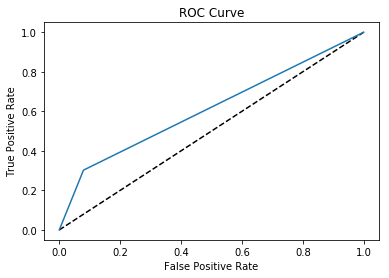

In [216]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [217]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_predict)
auc

0.6114431645294501

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [218]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [219]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfcl.fit(X_, y_)
    y_pred = rfcl.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [220]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.75
Standard deviation:  0.012202003478482102
